In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
/kaggle/input/image/IMG.png


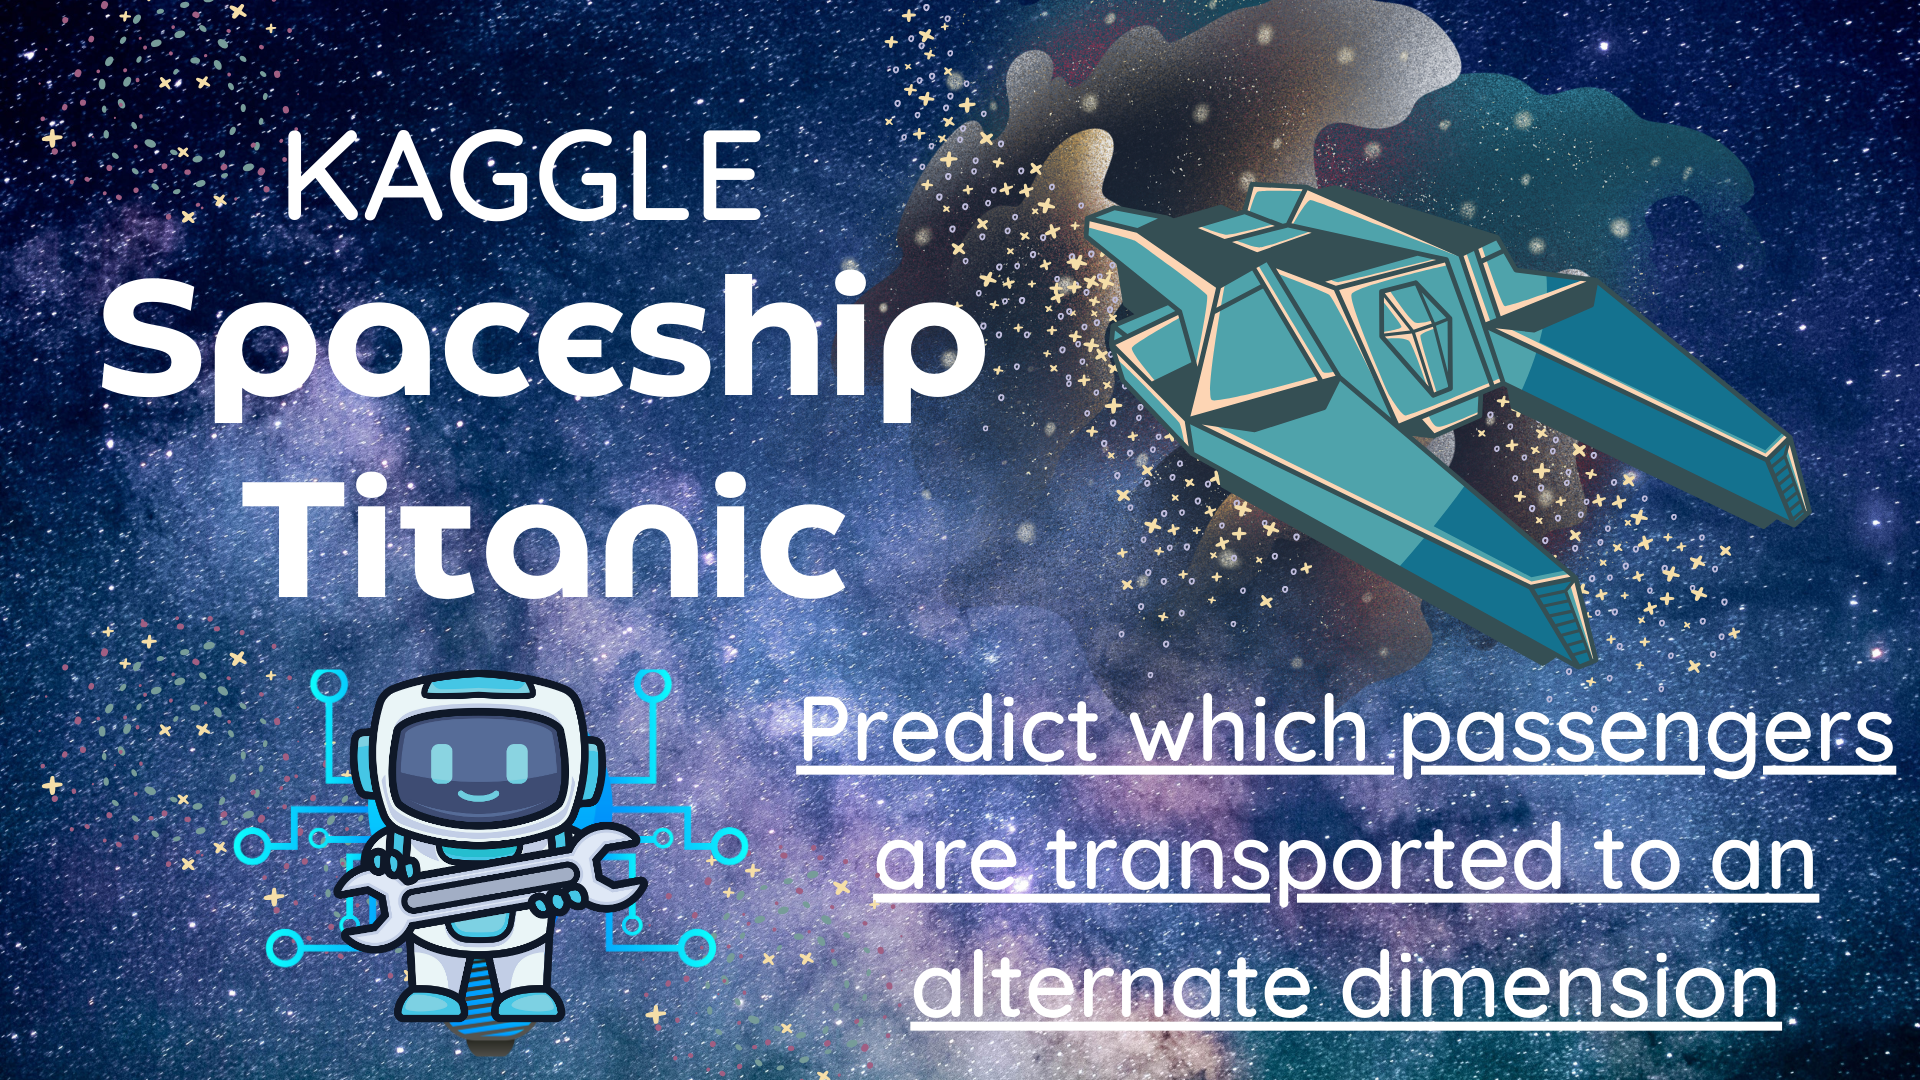

In [2]:
from PIL import Image
image_path = "/kaggle/input/image/IMG.png"
Image.open(image_path)

In [3]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
matplotlib.rcParams["figure.figsize"]=(15,7)

In [4]:
#loading Training File
df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [5]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [6]:
df.shape

(8693, 14)

In [7]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df=df.ffill()

/tmp/ipykernel_18/2683332704.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.ffill()


In [9]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [10]:
df.describe().style.background_gradient()

* The average age of passengers is approximately 29 years, with a broad range from infants to elderly individuals (0 to 79 years old).
* The data is fairly spread out, with a standard deviation of about 14.5 years.
* The median expenditure for RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck is 0, indicating that more than half of the passengers did not spend on these services.
* The mean values are significantly higher than the medians for all expenditure categories, suggesting that while most passengers did not spend much, a few passengers spent large amounts, leading to high average values.


In [11]:
#PassengerId - A unique Id for each passenger. 
#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with 
#and pp is their number within the group. 
#People in a group are often family members, but not always.

#CHEACK FOR ANY DUPLICATE PASSANGER ID
df['PassengerId'].nunique()==df.shape[0]

True

In [12]:
#that means we dont have any duplicate pasasnger ID
#CREATING NEW FEATURE AS PASSANGER GROUP
df["Passanger_Group"]=df['PassengerId'].str.split("_" , expand=True)[0]

In [13]:
print("Unique Number Of Passanger Groups ",df["Passanger_Group"].nunique())
#CALCULATING NO OF PASSANGER IN EACH GROUP
GROUPS=df.groupby('Passanger_Group').count().sort_values("PassengerId" , ascending=False).reset_index()[["Passanger_Group" ,'PassengerId']].rename(columns={"PassengerId": "COUNTS"})

Unique Number Of Passanger Groups  6217


In [14]:
GROUPS.sample(5)

Passanger_Group  COUNTS
4357            0122       1
3139            6926       1
4462            0298       1
857             6880       2
456             6452       3

In [15]:
#CHEACK FOR THE NUMBER OF GROUPS BY PASSANGER COUNT
GROUPS['COUNTS'].value_counts()

COUNTS
1    4805
2     841
3     340
4     103
5      53
7      33
6      29
8      13
Name: count, dtype: int64

In [16]:
#THE NUMBER OF GROUPS BY PASSANGER COUNT
GROUP_COUNT=GROUPS.groupby("COUNTS").count().reset_index().rename(columns={"COUNTS":"Passanger_Count" ,"Passanger_Group":"GROUP_COUNT"})
GROUP_COUNT.style.set_caption("Passenger Group Analysis").highlight_max(subset='GROUP_COUNT', color='lightgreen')

In [17]:
fig=px.bar(GROUP_COUNT , y="GROUP_COUNT" , x="Passanger_Count", color_discrete_sequence=["blue"],
        template="plotly_dark" , title="THE NUMBER OF GROUPS BY PASSANGER COUNT" , text_auto='.2s')
fig.update_layout(font_family="ROCKWELL")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

* Single Passenger Groups: The majority of groups (4805 out of 6217) consist of a single passenger.

* Small Groups: A significant number of groups have 2 or 3 passengers, with 841 and 340 groups respectively.

* Larger Groups: There are fewer groups with more than 3 passengers. Specifically:
* 103 groups have 4 passengers.
* 53 groups have 5 passengers.
* 29 groups have 6 passengers.
* 33 groups have 7 passengers.
* 13 groups have 8 passengers.

In [18]:
#COUNTS OF HOME PLANNETS
#HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
df['HomePlanet'].value_counts()

HomePlanet
Earth     4720
Europa    2177
Mars      1796
Name: count, dtype: int64

In [19]:
HOMEPLANET=df.groupby("HomePlanet").count().reset_index()[["HomePlanet",'PassengerId']].rename(columns={"PassengerId":"COUNTS"})
HOMEPLANET

HomePlanet  COUNTS
0      Earth    4720
1     Europa    2177
2       Mars    1796

In [20]:
fig=px.bar(HOMEPLANET , y="COUNTS" , x="HomePlanet", color_discrete_sequence=["red"],
        template="plotly_dark" , title="Number Of HomePlanet Of Passangers" , text_auto='.2s')
fig.update_layout(font_family="ROCKWELL").update_traces(width=0.5)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

* Earth: The majority of the passengers, 4,720, are from Earth.
* Europa: There are 2,177 passengers from Europa.
* Mars: Mars is the home planet for 1,796 passengers.

In [21]:
df['Passanger_Group']=df['Passanger_Group'].astype(int)

In [22]:
#GROUPING DATA WITH PASSANGER GROUP AND HOME PLANET
GROUP_HOME_PLANET=df.groupby(['Passanger_Group' ,"HomePlanet"]).count().reset_index()[['Passanger_Group' ,"HomePlanet" ,"PassengerId"]].rename(columns={'PassengerId':"COUNT"})
GROUP_HOME_PLANET.head()

Passanger_Group HomePlanet  COUNT
0                1     Europa      1
1                2      Earth      1
2                3     Europa      2
3                4      Earth      1
4                5      Earth      1

In [23]:
#THE NUMBER OF GROUPS BY PASSANGER COUNT AND HOME PLANET
TOTAL_GROUP_HOME_PLANET=GROUP_HOME_PLANET.groupby(["COUNT" ,"HomePlanet"]).count().reset_index().rename(columns={"COUNT":"Passanger_Count_in_Group" ,"Passanger_Group":"Total_Passanger_Group"})
TOTAL_GROUP_HOME_PLANET

Passanger_Count_in_Group HomePlanet  Total_Passanger_Group
0                          1      Earth                   3158
1                          1     Europa                    767
2                          1       Mars                    910
3                          2      Earth                    298
4                          2     Europa                    330
5                          2       Mars                    209
6                          3      Earth                    144
7                          3     Europa                     98
8                          3       Mars                     92
9                          4      Earth                     24
10                         4     Europa                     51
11                         4       Mars                     27
12                         5      Earth                     21
13                         5     Europa                     25
14                         5       Mars                      7
15                         6      Earth                     16
16                         6     Europa                     13
17                         7      Earth                     19
18                         7     Europa                      7
19                         7       Mars                      7
20                         8      Earth                     13

In [24]:
#THE NUMBER OF GROUPS BY PASSANGER COUNT AND HOME PLANET
fig=px.bar(TOTAL_GROUP_HOME_PLANET ,x="Passanger_Count_in_Group" ,y="Total_Passanger_Group" , 
           barmode='group' , color="HomePlanet" , text_auto=".2s" ,
            template='plotly_dark' , color_discrete_sequence=["royalblue" ,"lightslategrey" ,"crimson"])
fig.update_layout(bargap=0.2 ,font_family="ROCKWELL")
fig.update_traces(cliponaxis=False , textfont_size=12 , textangle=0 , textposition="outside")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* Single Passenger Groups:

Earth has the highest number of single passenger groups with 3,158 groups.
Europa and Mars have significantly fewer single passenger groups, with 767 and 910 groups, respectively.

* Small Groups (2-3 passengers):

For groups of 2 passengers, Europa has the most groups (330), followed by Earth (298) and Mars (209).
For groups of 3 passengers, Earth leads with 144 groups, followed by Europa (98) and Mars (92).


* The largest groups (8 passengers) are only from Earth with 13 groups

In [25]:
#CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
#Passengers in cryosleep are confined to their cabins.

In [26]:
df['CryoSleep'].value_counts()

CryoSleep
False    5582
True     3111
Name: count, dtype: int64

In [27]:
CryoSleep_counts=df.groupby("CryoSleep").count().reset_index()[["CryoSleep","PassengerId"]].rename(columns={"PassengerId":"Counts"})
CryoSleep_counts.style.set_caption("CryoSleep Status Analysis")

In [28]:
fig=px.bar(CryoSleep_counts , x="CryoSleep" , y="Counts" ,
       text_auto=".2s" , template="plotly_dark" , color_discrete_sequence=['green'])
fig.update_layout(font_family="ROCKWELL").update_traces(width=0.37)
fig.update_traces(cliponaxis=False , textposition="outside")

* Passengers Not in CryoSleep: The majority of passengers (5,582) were not in CryoSleep.
* Passengers in CryoSleep: A significant number of passengers (3,111) were in CryoSleep.

In [29]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Passanger_Group'],
      dtype='object')

In [30]:
CryoSleep_HOME_counts=df.groupby(["CryoSleep","HomePlanet"]).count().reset_index()[["CryoSleep","HomePlanet","PassengerId"]].rename(columns={"PassengerId":"Counts"})
CryoSleep_HOME_counts.style.set_caption("CryoSleep Status Analysis")

In [31]:
fig=px.bar(CryoSleep_HOME_counts , x="CryoSleep" , y="Counts" ,
       text_auto=".2s" , template="plotly_dark" ,color="HomePlanet" ,barmode="group" ,
           color_discrete_sequence=["royalblue" ,"lightslategrey" ,"crimson"])
fig.update_layout(font_family="ROCKWELL").update_traces(width=0.27)
fig.update_traces(cliponaxis=False , textposition="outside")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* Earth has the highest number of passengers not in CryoSleep with 3,264 passengers, followed by Europa (1,218) and Mars (1,100).

* Earth also has the highest number of passengers in CryoSleep with 1,456 passengers, followed by Europa (959) and Mars (696).

In [32]:
df['Cabin'].nunique()

6560

In [33]:
CABIN_PASSANGERS=df.groupby("Cabin").count().reset_index().sort_values("PassengerId" , ascending=False)[["Cabin" ,"PassengerId"]].rename(columns={"PassengerId" :"Passenger_Counts"})
CABIN_PASSANGERS.head()

Cabin  Passenger_Counts
4695   G/109/P                 8
2472  F/1194/P                 8
6156   G/734/S                 8
3338  F/1808/P                 7
6043   G/657/P                 7

In [34]:
#Distribution of Passenger Counts Across Different CABIN Group Sizes
CABIN_PASSANGERS['Passenger_Counts'].value_counts()

Passenger_Counts
1    5297
2     782
3     274
4     100
5      54
6      34
7      16
8       3
Name: count, dtype: int64

In [35]:
fig=px.bar(CABIN_PASSANGERS['Passenger_Counts'].value_counts() ,
      title="Distribution of Passenger Counts Across Different CABIN Group Sizes" ,
      template="plotly_dark" ,color_discrete_sequence=['gainsboro'] , text_auto=".2s")

fig.update_layout(font_family="ROCKWELL").update_traces(width=0.53)
fig.update_traces(cliponaxis=False , textposition="outside")

* Single Passenger Groups (1): The majority of groups consist of a single passenger, with a count of 5,297.
* Small Groups (2-4): Groups with 2 to 4 passengers are less common but still notable, ranging from 782 to 100 counts.
* Larger Groups (5+): Groups with 5 or more passengers are relatively rare, with counts decreasing as the group size increases.

In [36]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      6037
55 Cancri e      1840
PSO J318.5-22     816
Name: count, dtype: int64

In [37]:
fig=px.bar(df['Destination'].value_counts() ,
      title="Frequency of Passengers by Destination" ,
      template="plotly_dark" ,color_discrete_sequence=["skyblue"] , text_auto=".2s")

fig.update_layout(font_family="ROCKWELL").update_traces(width=0.53)
fig.update_traces(cliponaxis=False , textposition="outside")

* TRAPPIST-1e: The majority of passengers (6,037) are destined for TRAPPIST-1e.
* 55 Cancri e: 1,840 passengers are heading to 55 Cancri e.
* PSO J318.5-22: PSO J318.5-22 is the destination for 816 passengers.

In [38]:
Destination_home_counts=df.groupby(['HomePlanet' ,'Destination']).count().reset_index()[['HomePlanet' ,'Destination' ,"PassengerId"]].rename(columns={"PassengerId":"Passenger_Counts"})
Destination_home_counts

HomePlanet    Destination  Passenger_Counts
0      Earth    55 Cancri e               724
1      Earth  PSO J318.5-22               740
2      Earth    TRAPPIST-1e              3256
3     Europa    55 Cancri e               909
4     Europa  PSO J318.5-22                22
5     Europa    TRAPPIST-1e              1246
6       Mars    55 Cancri e               207
7       Mars  PSO J318.5-22                54
8       Mars    TRAPPIST-1e              1535

In [39]:
fig=px.bar(Destination_home_counts ,x="Destination" , y="Passenger_Counts" ,
           color="HomePlanet", barmode='group',
           title="Frequency of Passengers by Destination Filter With Home Planet" ,
           color_discrete_sequence=["skyblue","coral" ,"red"],
           template="plotly_dark" , text_auto=".2s")

fig.update_layout(font_family="ROCKWELL").update_traces(width=0.23)
fig.update_traces(cliponaxis=False , textposition="outside")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* Earth:

TRAPPIST-1e is the most common destination for passengers from Earth, with a count of 3,256.
PSO J318.5-22 and 55 Cancri e also have notable passenger counts from Earth, with 740 and 724 respectively.

* Europa:

Similar to Earth, TRAPPIST-1e is the most popular destination for passengers from Europa, with a count of 1,246.
55 Cancri e is the second most common destination, with 909 passengers, while PSO J318.5-22 has a lower count of 22 passengers.

* Mars:

TRAPPIST-1e has the highest number of passengers from Mars, with a count of 1,535.
55 Cancri e and PSO J318.5-22 also have passengers from Mars, but in smaller numbers compared to TRAPPIST-1e.

In [40]:
fig=px.bar(Destination_home_counts ,x="HomePlanet" , y="Passenger_Counts" ,
           color="Destination", barmode='group',
           title="Frequency of Passengers by HomePlanet Filter With  Destination" ,
            color_discrete_sequence=["skyblue","coral" ,"red"],
           template="plotly_dark" , text_auto=".2s")

fig.update_layout(font_family="ROCKWELL").update_traces(width=0.23)
fig.update_traces(cliponaxis=False , textposition="outside")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [41]:
df['Age'].describe()

count    8693.000000
mean       28.814448
std        14.495591
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [42]:
px.bar(df , y="Age" ,color_discrete_sequence =['green'] , orientation="h" ,
       template='plotly_dark' ,title="Age Distribution of Individuals")

In [43]:
px.box(df['Age'] ,color_discrete_sequence =['#1f77b4'] , orientation="h" ,
       template='plotly_dark' ,title="Age Distribution of Individuals")

In [44]:
age_bins=[0,18,25,40,50,60,70,80]
age_labels=["0-18" , "18-25", "25-40" ,"40-50" ,"50-60","60-70" , "70-80"]
df['Age_Group']=pd.cut(df['Age'] , bins=age_bins , labels=age_labels ,right=False )

In [45]:
df['Age_Group'].value_counts()

Age_Group
25-40    3058
18-25    2158
0-18     1579
40-50    1070
50-60     570
60-70     211
70-80      47
Name: count, dtype: int64

In [46]:
df['Age_Group'].isna().sum()

0

In [47]:
fig=px.bar(df['Age_Group'].value_counts() , title="Age_Groups Of Pasangers" ,color_discrete_sequence=['#00ff00'] ,
       template='plotly_dark',text_auto='.2s')

fig.update_layout(font_family="ROCKWELL",yaxis_title="Number of Passengers")
fig.update_traces(cliponaxis=False , textposition='outside')


* 25-40 Age Group: The largest number of passengers, 3,058, fall into the age group of 25-40.
* 18-25 Age Group: Following closely, there are 2,158 passengers in the age group of 18-25.
* 0-18 Age Group: A significant number of passengers, 1,579, are in the age group of 0-18.
* 40-50 to 70-80 Age Groups: Successive age groups from 40-50 to 70-80 show a decreasing trend in passenger counts, indicating fewer passengers in older age groups.

In [48]:
AGE_GROUP_HOME_PLANET=df.groupby(['HomePlanet' , "Age_Group"]).count().reset_index()[['HomePlanet',"Age_Group" ,"PassengerId"]].rename(columns={'PassengerId':"Passenger_Counts"}).sort_values("Passenger_Counts" , ascending=False)
AGE_GROUP_HOME_PLANET.head()

/tmp/ipykernel_18/3442742657.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



HomePlanet Age_Group  Passenger_Counts
1       Earth     18-25              1494
2       Earth     25-40              1300
0       Earth      0-18              1106
9      Europa     25-40              1077
16       Mars     25-40               681

In [49]:
fig=px.bar(AGE_GROUP_HOME_PLANET , x='Age_Group', y='Passenger_Counts', color='HomePlanet', color_discrete_sequence=['#003366', '#ff3333', '#00ffff'],
       template='plotly_dark',text_auto='.2s',barmode='group' , title='Passenger Age Groups Across Home-Planets')

fig.update_layout(font_family="ROCKWELL",yaxis_title="Number of Passengers")
fig.update_traces(cliponaxis=False , textposition='outside')


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [50]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Passanger_Group', 'Age_Group'],
      dtype='object')

In [51]:
AGE_GROUP_HOME_PLANET_DESTINATION=df.groupby(['HomePlanet' ,"Destination", "Age_Group"]).count().reset_index()[['HomePlanet',"Age_Group" ,"PassengerId" ,"Destination"]].rename(columns={'PassengerId':"Passenger_Counts"}).sort_values("Passenger_Counts" , ascending=False)
AGE_GROUP_HOME_PLANET_DESTINATION.head()

/tmp/ipykernel_18/1330270831.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



HomePlanet Age_Group  Passenger_Counts  Destination
15      Earth     18-25              1033  TRAPPIST-1e
16      Earth     25-40               919  TRAPPIST-1e
14      Earth      0-18               715  TRAPPIST-1e
37     Europa     25-40               624  TRAPPIST-1e
58       Mars     25-40               585  TRAPPIST-1e

In [52]:
AGE_GROUP_HOME_PLANET_DESTINATION['Destination'].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype=object)

In [53]:
space_colors = ["royalblue", "mediumvioletred", "mediumspringgreen"]
fig=px.scatter(AGE_GROUP_HOME_PLANET_DESTINATION ,y='Age_Group' , x='Passenger_Counts',color_discrete_sequence=space_colors,
               size='Passenger_Counts' ,color ='HomePlanet' ,symbol='Destination'
              ,template='plotly_dark' , title="Space Voyage: Passenger Counts by Age Group ,Home Planet and the Destination")
fig.update_traces(marker=dict(line_color="white", line_width=1))

fig.update_layout(
    plot_bgcolor="black", 
    xaxis_title="Passenger Counts",
    yaxis_title="Age Group",
    legend_title_text="Home Planet & Detination",
    font_family='ROCKWELL'
)

In [54]:
labels = {
    "HomePlanet": "Home Planet",
    "Destination": "Destination",
    "Passenger_Counts": "Number of Passengers"
}

fig=px.sunburst(AGE_GROUP_HOME_PLANET_DESTINATION ,path=["HomePlanet" ,"Destination"],
            values='Passenger_Counts' ,color_discrete_sequence=['darkblue' , "darkorchid","firebrick"] , 
            title='Passenger Distribution by Home Planet and Destination' ,
            template='plotly_dark' ,labels=labels )
fig.update_traces(marker=dict(line_color="white", line_width=0.77))
fig.update_layout(font_family='ROCKWELL')

In [55]:
fig=px.bar(df['VIP'].value_counts() , title="VIP Counts Of Pasangers" ,color_discrete_sequence=['#00ff00'] ,
       template='plotly_dark',text_auto='.2s')

fig.update_layout(font_family="ROCKWELL",yaxis_title="Number of Passengers")
fig.update_traces(cliponaxis=False , textposition='outside' , width=0.27)

In [56]:
#RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 
#Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].describe()

RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count   8693.000000   8693.000000   8693.000000   8693.000000   8693.000000
mean     224.358909    459.524215    171.978834    311.027723    304.271713
std      663.194283   1611.321116    598.884988   1135.434090   1148.856635
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       48.000000     77.000000     26.000000     61.000000     44.000000
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000

In [57]:
Age_group_amenities=df.groupby("Age_Group").sum()[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].reset_index()

/tmp/ipykernel_18/848715793.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [58]:
Age_group_amenities

Age_Group  RoomService  FoodCourt  ShoppingMall        Spa     VRDeck
0      0-18     162888.0   142500.0      168867.0   118540.0   106303.0
1     18-25     503865.0   476488.0      415569.0   501701.0   427085.0
2     25-40     810777.0  2141881.0      569396.0  1212202.0  1395940.0
3     40-50     282560.0   717645.0      220826.0   475229.0   381656.0
4     50-60     122510.0   365380.0       74214.0   244162.0   249772.0
5     60-70      50711.0   129292.0       39446.0   108662.0    72560.0
6     70-80      17041.0    21458.0        6694.0    43268.0    11718.0

In [59]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig=make_subplots(rows=3 ,cols=2 ,shared_yaxes=True ,x_title ='Age_Group' , y_title="Amount Spent By Passanger",
                 subplot_titles=("RoomService_Spent_Amount", "FoodCourt_Spent_Amount", "ShoppingMall_Amount", "Spa_Spent_Amount" ,"VRDeck_Spent_Amount"))

fig.add_trace(go.Bar(x=Age_group_amenities ['Age_Group'] ,y=Age_group_amenities['RoomService'] ,text=Age_group_amenities['RoomService']),1,1)
fig.add_trace(go.Bar(x=Age_group_amenities ['Age_Group'] ,y=Age_group_amenities['FoodCourt'] ,text=Age_group_amenities['FoodCourt']),1,2)
fig.add_trace(go.Bar(x=Age_group_amenities ['Age_Group'] ,y=Age_group_amenities['ShoppingMall'] ,text=Age_group_amenities['ShoppingMall']),2,1)
fig.add_trace(go.Bar(x=Age_group_amenities ['Age_Group'] ,y=Age_group_amenities['Spa'], text=Age_group_amenities['Spa']),2,2)
fig.add_trace(go.Bar(x=Age_group_amenities ['Age_Group'] ,y=Age_group_amenities['VRDeck'] ,text=Age_group_amenities['VRDeck']),3,1)


fig.update_layout(font_family="ROCKWELL",
                  height=1500, width=1000 ,title_text="Amount the Different Age-Group-Passangers of the Spaceship Titanic's Each luxury Amenitiy",template='plotly_dark')
fig.update_traces(cliponaxis=False , textposition='outside')

In [60]:
df['Name'].duplicated().any()

True

In [61]:
df['Total_expenditure']=df['RoomService'] +df['FoodCourt']+df['ShoppingMall'] +df['Spa'] +df['VRDeck']

In [62]:
df['Total_expenditure'].describe()

count     8693.000000
mean      1471.161394
std       2821.075176
min          0.000000
25%          0.000000
50%        724.000000
75%       1492.000000
max      35987.000000
Name: Total_expenditure, dtype: float64

In [63]:
px.box(df , x='Total_expenditure' ,color=('Age_Group') , template='plotly_dark')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [64]:
df[df['Name'].duplicated()][["PassengerId" ,"HomePlanet","Name"]]

PassengerId HomePlanet               Name
27       0022_01       Mars  Terta Mcfaddennon
58       0064_01       Mars     Sterry Greeves
65       0069_01      Earth        Cinst Binie
77       0082_03       Mars       Eaturs Datte
101      0108_02      Earth   Natald Handertiz
...          ...        ...                ...
8629     9205_02     Europa    Thaldah Brakeng
8631     9208_01      Earth    Propent Brakeng
8636     9218_01     Europa   Jasony Mckinsond
8652     9230_01     Europa    Hard Hinglendez
8664     9246_01      Earth    Chrisa Francock

[220 rows x 3 columns]

In [65]:
df[df['Name']=="Sterry Greeves"]

PassengerId HomePlanet  CryoSleep   Cabin  Destination   Age    VIP  \
57     0062_01      Earth      False  F/13/S  TRAPPIST-1e  62.0  False   
58     0064_01       Mars       True  F/14/S  TRAPPIST-1e  15.0  False   

    RoomService  FoodCourt  ShoppingMall   Spa  VRDeck            Name  \
57          0.0      592.0           0.0  17.0    25.0  Sterry Greeves   
58          0.0        0.0           0.0   0.0     0.0  Sterry Greeves   

    Transported  Passanger_Group Age_Group  Total_expenditure  
57        False               62     60-70              634.0  
58         True               64      0-18                0.0

In [66]:
#This means even though person having same names , their other features are different

In [67]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [68]:
transported_df=df.groupby(['Transported' ,'HomePlanet', 'CryoSleep' ,'Destination' ,'Age_Group']).count().reset_index()[["PassengerId" ,'Transported' ,'HomePlanet', 'CryoSleep' ,'Destination' ,'Age_Group']].rename(columns={"PassengerId":"Passenger_Counts"})
transported_df.head()

/tmp/ipykernel_18/1418291454.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Passenger_Counts  Transported HomePlanet  CryoSleep  Destination Age_Group
0                73        False      Earth      False  55 Cancri e      0-18
1               103        False      Earth      False  55 Cancri e     18-25
2                83        False      Earth      False  55 Cancri e     25-40
3                24        False      Earth      False  55 Cancri e     40-50
4                19        False      Earth      False  55 Cancri e     50-60

In [69]:
fig=px.pie(transported_df  ,values='Passenger_Counts' , names='Transported', hole =0.45 , 
           template='plotly_dark' ,color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='percent+label')

In [70]:
fig=px.bar(transported_df , x='Transported' ,y="Passenger_Counts" , color='Age_Group' , 
       barmode='group' , facet_col='HomePlanet' , title='Frequency Of Transported Passangers as Per Home-Planet and Age group',
       template='plotly_dark' ,color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(font_family='ROCKWELL')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [71]:
fig=px.bar(transported_df , x='Transported' ,y="Passenger_Counts" , color='Age_Group' , 
       barmode='group' , facet_col='Destination' , title='Frequency Of Transported Passangers as Per Destination and Age group',
       template='plotly_dark' ,color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(font_family='ROCKWELL')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [72]:
fig=px.scatter(transported_df  ,y='Age_Group' , x='Passenger_Counts',color_discrete_sequence=px.colors.qualitative.Prism,
               size='Passenger_Counts' ,color ='HomePlanet' ,symbol='Destination' ,facet_col='Transported'
              ,template='plotly_dark' , title="Transported Passanger Details" ,facet_row='CryoSleep')
fig.update_traces(marker=dict(line_color="white", line_width=1))

fig.update_layout(
    plot_bgcolor="black", 
    xaxis_title="Passenger Counts",
    yaxis_title="Age Group",
    legend_title_text="Home Planet & Detination",
    font_family='ROCKWELL'
)

In [73]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Passanger_Group', 'Age_Group',
       'Total_expenditure'],
      dtype='object')

In [74]:
fig=px.parallel_categories(df ,color_continuous_scale=px.colors.sequential.Inferno,
                      dimensions =['Age_Group',"CryoSleep",'HomePlanet' ,'Destination' ,'Transported'],
                      title='Passenger Demographics and Travel Preferences in Space Transport' ,
                      template='plotly_dark')

fig.update_layout(font_family='ROCKWELL' ,plot_bgcolor='white')

In [75]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Passanger_Group', 'Age_Group',
       'Total_expenditure'],
      dtype='object')

In [76]:
fig=px.density_contour(df ,x='Transported' , y="Age_Group")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)

## MODEL BUILDING

In [77]:
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.metrics import accuracy_score , roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [78]:
input_cols=df.drop(['PassengerId' ,'Cabin' ,'Name' ,'Age_Group' ,'Total_expenditure' ,'Transported'] ,axis=1).columns
output_col='Transported'

In [79]:
train_data , val_data=train_test_split(df , random_state=42 ,test_size=0.2)
train_data.shape , val_data.shape

((6954, 17), (1739, 17))

In [80]:
train_inputs=train_data[input_cols]
train_target=train_data[output_col]

val_inputs=val_data[input_cols]
val_target=val_data[output_col]

In [81]:
numeric_cols=train_inputs.select_dtypes(np.number).columns.to_list()
categoric_cols=train_inputs.select_dtypes('object').columns.to_list()

In [82]:
encoder=OneHotEncoder(sparse=False , handle_unknown='ignore')
encoder.fit(train_inputs[categoric_cols])

scaler=MinMaxScaler()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [83]:
column_trans =make_column_transformer(
    (OneHotEncoder(sparse=False ,categories=encoder.categories_, handle_unknown='ignore'),categoric_cols),
    (MinMaxScaler() ,numeric_cols),
    remainder='passthrough')

In [84]:
LR_model=LogisticRegression()
LR_pipe=make_pipeline(column_trans,LR_model)
LR_pipe.fit(train_inputs , train_target)
LR_train_pred=LR_pipe.predict(train_inputs)
LR_val_pred=LR_pipe.predict(val_inputs)

#accuracy
print("LogisticRegression Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,LR_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,LR_val_pred))
LR=accuracy_score(val_target ,LR_val_pred)
LR_ROC=roc_auc_score(val_target ,LR_val_pred)

LogisticRegression Model Results
Train Accuracy 0.7647397181478286
Val Accuracy 0.7550316273720529


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [85]:
RF_model=RandomForestClassifier()
RF_pipe= make_pipeline(column_trans,RF_model)
RF_pipe.fit(train_inputs,train_target)

RF_train_pred=RF_pipe.predict(train_inputs)
RF_val_pred=RF_pipe.predict(val_inputs)

#accuracy
print("RandomForestClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,RF_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,RF_val_pred))
RF=accuracy_score(val_target ,RF_val_pred)
RF_ROC=roc_auc_score(val_target ,RF_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



RandomForestClassifier Model Results
Train Accuracy 0.9992809893586425
Val Accuracy 0.7797584818861415


In [86]:
MLP_model=MLPClassifier()
MLP_pipe= make_pipeline(column_trans,MLP_model)
MLP_pipe.fit(train_inputs,train_target)

MLP_train_pred=MLP_pipe.predict(train_inputs)
MLP_val_pred=MLP_pipe.predict(val_inputs)

#accuracy
print("MLPClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,MLP_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,MLP_val_pred))
MLP=accuracy_score(val_target ,MLP_val_pred)
MLP_ROC=roc_auc_score(val_target ,MLP_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



MLPClassifier Model Results
Train Accuracy 0.8002588438308887
Val Accuracy 0.7797584818861415


In [87]:
from sklearn.gaussian_process import GaussianProcessClassifier
GUP_model=GaussianProcessClassifier()
GUP_pipe= make_pipeline(column_trans,GUP_model)
GUP_pipe.fit(train_inputs,train_target)

GUP_train_pred=GUP_pipe.predict(train_inputs)
GUP_val_pred=GUP_pipe.predict(val_inputs)

#accuracy
print("GaussianProcessClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,GUP_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,GUP_val_pred))
GUP=accuracy_score(val_target ,GUP_val_pred)
GUP_ROC=roc_auc_score(val_target ,GUP_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



GaussianProcessClassifier Model Results
Train Accuracy 0.763733103249928
Val Accuracy 0.7567567567567568


In [88]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_pipe= make_pipeline(column_trans,KNN_model)
KNN_pipe.fit(train_inputs,train_target)

KNN_train_pred=KNN_pipe.predict(train_inputs)
KNN_val_pred=KNN_pipe.predict(val_inputs)

#accuracy
print("KNeighborsClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,KNN_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,KNN_val_pred))
KNN=accuracy_score(val_target ,KNN_val_pred)
KNN_ROC=roc_auc_score(val_target ,KNN_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



KNeighborsClassifier Model Results
Train Accuracy 0.8213977566867989
Val Accuracy 0.7389304197814837


In [89]:
from sklearn.linear_model import SGDClassifier
SGD_model=SGDClassifier()
SGD_pipe= make_pipeline(column_trans,SGD_model)
SGD_pipe.fit(train_inputs,train_target)

SGD_train_pred=SGD_pipe.predict(train_inputs)
SGD_val_pred=SGD_pipe.predict(val_inputs)

#accuracy
print("SGDClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,SGD_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,SGD_val_pred))
SGD=accuracy_score(val_target ,SGD_val_pred)
SGD_ROC=roc_auc_score(val_target ,SGD_val_pred)

SGDClassifier Model Results
Train Accuracy 0.7602818521714121
Val Accuracy 0.753306497987349


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [90]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
DT_pipe= make_pipeline(column_trans,DT_model)
DT_pipe.fit(train_inputs,train_target)

DT_train_pred=DT_pipe.predict(train_inputs)
DT_val_pred=DT_pipe.predict(val_inputs)

#accuracy
print("DecisionTreeClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,DT_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,DT_val_pred))
DT=accuracy_score(val_target ,DT_val_pred)
DT_ROC=roc_auc_score(val_target ,DT_val_pred)

DecisionTreeClassifier Model Results
Train Accuracy 0.9992809893586425
Val Accuracy 0.7245543415756182


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [91]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier()
GB_pipe= make_pipeline(column_trans,GB_model)
GB_pipe.fit(train_inputs,train_target)

GB_train_pred=GB_pipe.predict(train_inputs)
GB_val_pred=GB_pipe.predict(val_inputs)

#accuracy
print("GradientBoostingClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,GB_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,GB_val_pred))
GB=accuracy_score(val_target ,GB_val_pred)
GB_ROC=roc_auc_score(val_target ,GB_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



GradientBoostingClassifier Model Results
Train Accuracy 0.815933275812482
Val Accuracy 0.7826336975273146


In [92]:
!pip install lightgbm

In [93]:
from lightgbm import LGBMClassifier
LGBM_model=LGBMClassifier()
LGBM_pipe= make_pipeline(column_trans,LGBM_model)
LGBM_pipe.fit(train_inputs,train_target)

LGBM_train_pred=LGBM_pipe.predict(train_inputs)
LGBM_val_pred=LGBM_pipe.predict(val_inputs)

#accuracy
print("LGBMMClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,LGBM_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,LGBM_val_pred))
LGBM=accuracy_score(val_target ,LGBM_val_pred)
LGBM_ROC=roc_auc_score(val_target ,LGBM_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
LGBMMClassifier Model Results
Train Accuracy 0.8695714696577509
Val Accuracy 0.7740080506037953


In [94]:
from xgboost.sklearn import XGBClassifier
XGB_model=XGBClassifier()
XGB_pipe= make_pipeline(column_trans,XGB_model)
XGB_pipe.fit(train_inputs,train_target)

XGB_train_pred=XGB_pipe.predict(train_inputs)
XGB_val_pred=XGB_pipe.predict(val_inputs)

#accuracy
print("XGBClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,XGB_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,XGB_val_pred))
XGB=accuracy_score(val_target ,XGB_val_pred)
XGB_ROC=roc_auc_score(val_target ,XGB_val_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



XGBClassifier Model Results
Train Accuracy 0.917169974115617
Val Accuracy 0.7711328349626222


In [95]:
results=pd.DataFrame({"LR":[LR ,LR_ROC] ,"DT":[DT , DT_ROC] ,"RF":[RF , RF_ROC] ,"MLP":[MLP, MLP_ROC] , 
                      "GUP":[GUP , GUP_ROC] ,"KNN":[KNN , KNN_ROC] ,"SGD":[SGD ,SGD_ROC] ,"GB":[GB , GB_ROC] , "LGBM":[LGBM,LGBM_ROC],
                      "XGB":[XGB , XGB_ROC]}).T.rename(columns={0:"Accuracy" ,1:"ROC_AUC"})

In [96]:
results=results.sort_values('Accuracy' , ascending=False)
results

Accuracy   ROC_AUC
GB    0.782634  0.782174
RF    0.779758  0.779867
MLP   0.779758  0.779518
LGBM  0.774008  0.773801
XGB   0.771133  0.771032
GUP   0.756757  0.757448
LR    0.755032  0.755469
SGD   0.753306  0.753929
KNN   0.738930  0.739097
DT    0.724554  0.724500

In [97]:
line=px.line(data_frame= results ,x=results.index,y =["Accuracy"] , 
             markers = True, template='plotly_dark', line_shape='spline')
line.update_traces(line_color="red")
line.update_xaxes(title="Model",
                  rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [98]:
line=px.line(data_frame= results ,x=results.index,y =["ROC_AUC"] , 
             markers = True, template='plotly_dark', line_shape='spline')
line.update_traces(line_color="blue")
line.update_xaxes(title="Model",
                  rangeslider_visible = False)
line.update_yaxes(title = "ROC_AUC")
line.update_layout(showlegend = True,
    title = {
        'text': 'ROC_AUC Score vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [99]:
from sklearn.model_selection import RandomizedSearchCV
GB_model=GradientBoostingClassifier()
params={'loss' :['log_loss', 'exponential'],
        'learning_rate' :[0.01 ,0.05, 0.1 ,0.2 ,0.3 ,0.8],
        'max_depth' :[3,5,6,7,8,9,10]}

clf=RandomizedSearchCV(GB_model , param_distributions=params ,cv=10, scoring='accuracy')

GB_pipe= make_pipeline(column_trans,clf)
GB_pipe.fit(train_inputs,train_target)

GB_train_pred=GB_pipe.predict(train_inputs)
GB_val_pred=GB_pipe.predict(val_inputs)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [100]:
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, loss='exponential')

In [101]:
clf.best_score_

0.7947959563383776

In [102]:
#accuracy
print("GradientBoostingClassifier Model Results")
print("Train Accuracy" ,accuracy_score(train_target ,GB_train_pred))
print("Val Accuracy" ,accuracy_score(val_target ,GB_val_pred))
GB=accuracy_score(val_target ,GB_val_pred)
GB_ROC=roc_auc_score(val_target ,GB_val_pred)

GradientBoostingClassifier Model Results
Train Accuracy 0.8083117630140926
Val Accuracy 0.7826336975273146


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_target ,GB_val_pred)

array([[625, 236],
       [142, 736]])

Text(39.47222222222222, 0.5, 'y_true')

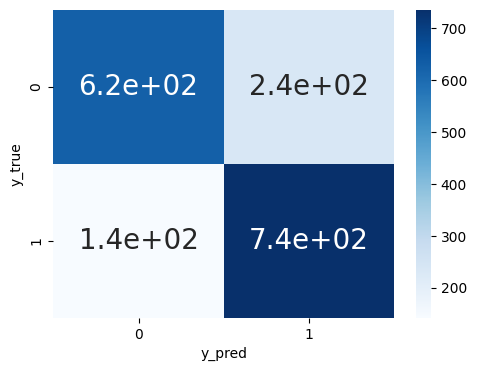

In [104]:
plt.figure(figsize=(5.5,4))
sns.heatmap(confusion_matrix(val_target ,GB_val_pred),cmap="Blues", annot=True,annot_kws={"size": 20})
plt.xlabel("y_pred")
plt.ylabel("y_true")

## Submission

In [105]:
train_inputs.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Passanger_Group'],
      dtype='object')

In [106]:
test_data=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [107]:
test_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [108]:
test_data["Passanger_Group"]=test_data['PassengerId'].str.split("_" , expand=True)[0]
test_data['Passanger_Group']=test_data['Passanger_Group'].astype(int)

In [109]:
test_inputs=test_data[train_inputs.columns]

In [110]:
test_inputs.isna().sum()

HomePlanet          87
CryoSleep           93
Destination         92
Age                 91
VIP                 93
RoomService         82
FoodCourt          106
ShoppingMall        98
Spa                101
VRDeck              80
Passanger_Group      0
dtype: int64

In [111]:
test_inputs=test_inputs.ffill()

/tmp/ipykernel_18/128491513.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [112]:
GB_test_pred=GB_pipe.predict(test_inputs)

In [113]:
GB_test_pred

array([ True, False,  True, ...,  True,  True,  True])

In [114]:
test_data['Transported']=GB_test_pred

In [115]:
submission=test_data[['PassengerId','Transported']]

In [116]:
submission.sample(5)

PassengerId  Transported
3878     8473_01         True
1431     3072_01         True
4189     9086_02        False
3452     7539_01         True
1353     2911_01         True

In [117]:
submission.to_csv('submission.csv' , index=False)